In [1157]:
import pandas as pd
import matplotlib.pyplot as plt

In [1158]:
df = pd.read_csv('PremierLeague.csv')

In [1159]:
df.head()

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1,1,D,2006-2007
1,Arsenal,Aston Villa,1,1,D,2006-2007
2,Everton,Watford,2,1,H,?
3,Newcastle United,Wigan Athletic,2,1,H,2006-2007
4,Portsmouth,Blackburn Rovers,3,0,H,2006-2007


In [1160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   home_team   4560 non-null   object
 1   away_team   4560 non-null   object
 2   home_goals  4560 non-null   int64 
 3   away_goals  4560 non-null   int64 
 4   result      4560 non-null   object
 5   season      4560 non-null   object
dtypes: int64(2), object(4)
memory usage: 213.9+ KB


In [1161]:
df.describe()

,home_goals,away_goals
count,4560.000000,4560.000000
mean,1.516009,1.114693
std,1.345936,1.175256
min,-4.000000,-4.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,9.000000,7.000000


In [1162]:
#########################################################################################################

In [1163]:
''' 
1. Replace invalid values from the season column
'''

' \n1. Replace invalid values from the season column\n'

In [1164]:
df['season'].value_counts(sort=True)

season
2007-2008    380
2008-2009    380
2009-2010    380
2010-2011    380
2011-2012    380
2012-2013    380
2013-2014    380
2014-2015    380
2015-2016    380
2016-2017    380
2017-2018    380
2006-2007    349
?             31
Name: count, dtype: int64

In [1165]:
# Data Cleaning
# Answer
df.loc[df["season"] == "?", 'season'] = "2006-2007"

In [1166]:
df.head()

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1,1,D,2006-2007
1,Arsenal,Aston Villa,1,1,D,2006-2007
2,Everton,Watford,2,1,H,2006-2007
3,Newcastle United,Wigan Athletic,2,1,H,2006-2007
4,Portsmouth,Blackburn Rovers,3,0,H,2006-2007


In [1167]:
#########################################################################################################

In [1168]:
'''
2. Identify invalid values and Replace all the invalid goals in home_goals and away_goals with 0.
'''

'\n2. Identify invalid values and Replace all the invalid goals in home_goals and away_goals with 0.\n'

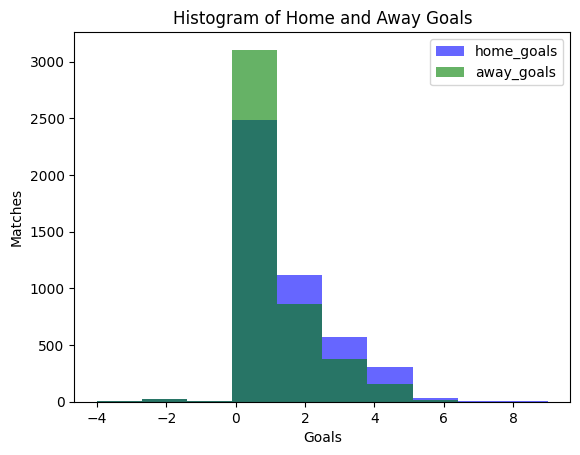

In [1169]:
df[['home_goals', 'away_goals']].plot(kind='hist', 
                                      alpha=0.6, 
                                      bins=10,
                                      color=['blue','green'],
                                      xlabel='Goals',
                                      ylabel='Matches',
                                      title='Histogram of Home and Away Goals')

plt.show()

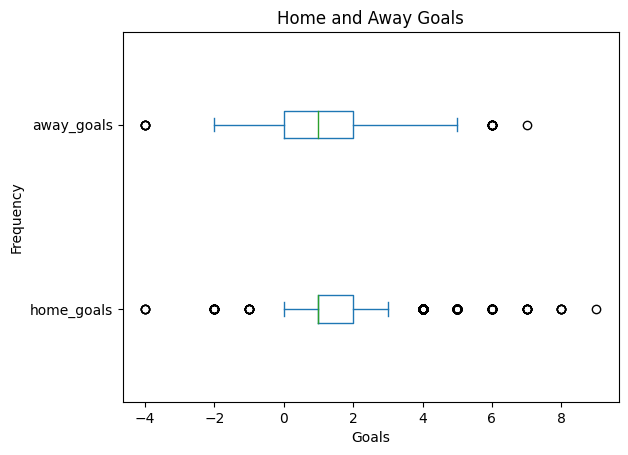

In [1170]:
df[['home_goals', 'away_goals']].plot(kind='box',
                                      title='Home and Away Goals',
                                      xlabel='Goals',
                                      ylabel='Frequency',
                                      vert=False)

plt.show()

In [1171]:
((df['home_goals'] < 0).sum()
+
(df['away_goals'] < 0).sum())

73

In [1172]:
# Data Cleaning
# Answer
df.loc[df['home_goals'] < 0, 'home_goals'] = 0
df.loc[df['away_goals'] < 0, 'away_goals'] = 0

In [1173]:
df.loc[ (df['home_goals'] < 0) | (df['away_goals'] < 0) ]

,home_team,away_team,home_goals,away_goals,result,season


In [1174]:
#########################################################################################################

In [1175]:
''' 
3. Identify and clean invalid results in the result columnThe result column contains a "summary" of the result of the match. 
H indicates a home win
A indicates an away win
D indicates a draw.
'''

' \n3. Identify and clean invalid results in the result columnThe result column contains a "summary" of the result of the match. \nH indicates a home win\nA indicates an away win\nD indicates a draw.\n'

In [1176]:
df['result'].value_counts()

result
H    2088
A    1278
D    1151
?      43
Name: count, dtype: int64

In [1177]:
# Answer
df.loc[df['home_goals'] == df['away_goals'], 'result'] = 'D'
df.loc[df['home_goals'] > df['away_goals'], 'result'] = 'H'
df.loc[df['home_goals'] < df['away_goals'], 'result'] = 'A'

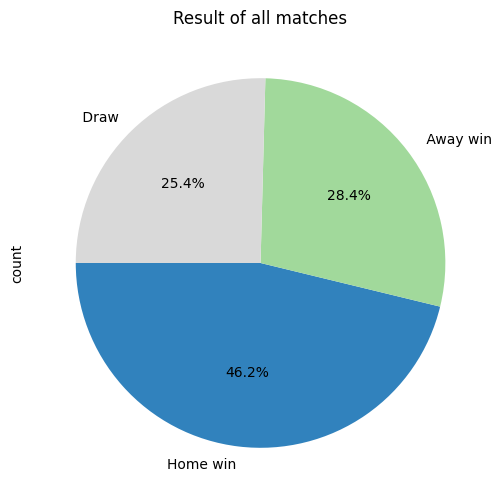

In [1178]:
df['result'].value_counts().plot(kind='pie', 
                                 labels=['Home win',' Away win',' Draw'],
                                 title='Result of all matches', 
                                 autopct='%1.1f%%', 
                                 cmap='tab20c', 
                                 figsize=(6, 6),
                                 startangle=180)

plt.show()

In [1179]:
#########################################################################################################

In [1180]:
'''
4. Create a new column total_goals per match.
'''

'\n4. Create a new column total_goals per match.\n'

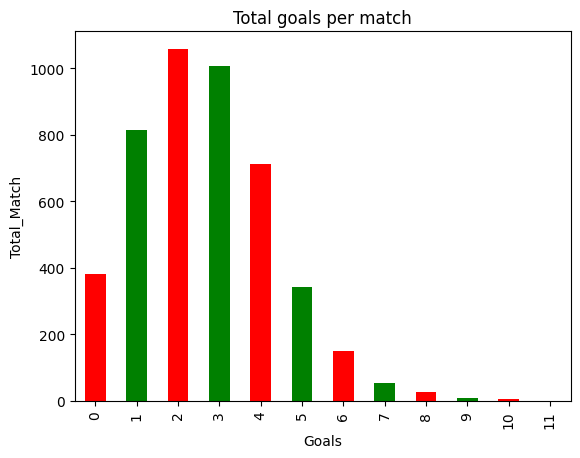

In [1181]:
(df['home_goals'] + df['away_goals']).value_counts().sort_index().plot(kind='bar',
                                                                       color=['red','green'],
                                                                       xlabel='Goals',
                                                                       ylabel='Total_Match',
                                                                       title='Total goals per match'
                                                                       )

plt.show()

In [1182]:
# Answer
df['total_goals'] = df['home_goals'] + df['away_goals']

In [1183]:
df.head()

,home_team,away_team,home_goals,away_goals,result,season,total_goals
0,Sheffield United,Liverpool,1,1,D,2006-2007,2
1,Arsenal,Aston Villa,1,1,D,2006-2007,2
2,Everton,Watford,2,1,H,2006-2007,3
3,Newcastle United,Wigan Athletic,2,1,H,2006-2007,3
4,Portsmouth,Blackburn Rovers,3,0,H,2006-2007,3


In [1184]:
df.loc[df[['total_goals']].idxmax()]

,home_team,away_team,home_goals,away_goals,result,season,total_goals
450,Portsmouth,Reading,7,4,H,2007-2008,11


In [1185]:
(df['home_goals'] + df['away_goals']).mean()

2.6633771929824563

In [1186]:
#########################################################################################################

In [1187]:
'''
5. Calculate average goals per season.
'''

'\n5. Calculate average goals per season.\n'

In [1188]:
# aggregation and filtering
# Answer
goals_per_season = df.groupby('season')['total_goals'].mean().sort_index()
goals_per_season

season
2006-2007    2.428947
2007-2008    2.618421
2008-2009    2.463158
2009-2010    2.747368
2010-2011    2.797368
2011-2012    2.763158
2012-2013    2.773684
2013-2014    2.718421
2014-2015    2.500000
2015-2016    2.676316
2016-2017    2.794737
2017-2018    2.678947
Name: total_goals, dtype: float64

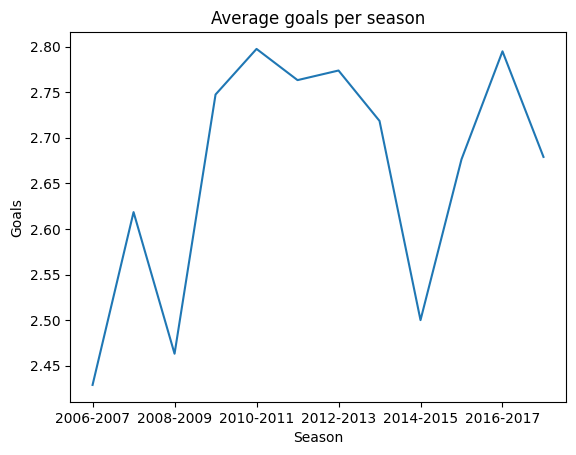

In [1189]:
goals_per_season.plot(kind='line',
                      xlabel='Season',
                      ylabel='Goals',
                      title='Average goals per season')
plt.show()

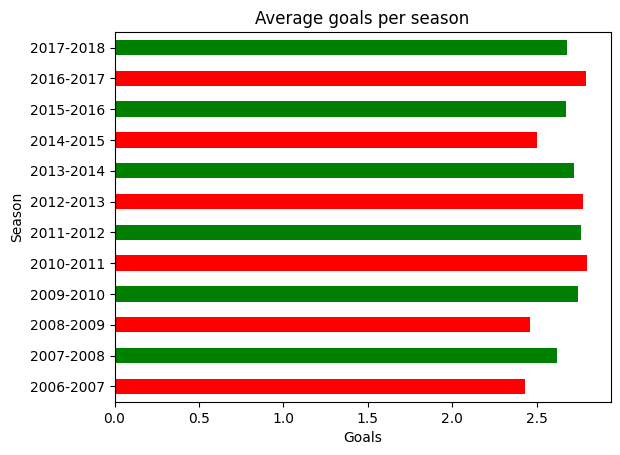

In [1190]:
goals_per_season.plot(kind='barh',
                      color=['red','green'],
                      xlabel='Goals',
                      ylabel='Season',
                      title='Average goals per season')
plt.show()

In [1191]:
#########################################################################################################

In [1192]:
'''
6. What's the biggest goal difference in a match?
'''

"\n6. What's the biggest goal difference in a match?\n"

In [1193]:
df['goal_differences'] = (df['home_goals'] - df['away_goals']).abs().sort_values(ascending=False)

In [1194]:
df.head()

,home_team,away_team,home_goals,away_goals,result,season,total_goals,goal_differences
0,Sheffield United,Liverpool,1,1,D,2006-2007,2,0
1,Arsenal,Aston Villa,1,1,D,2006-2007,2,0
2,Everton,Watford,2,1,H,2006-2007,3,1
3,Newcastle United,Wigan Athletic,2,1,H,2006-2007,3,1
4,Portsmouth,Blackburn Rovers,3,0,H,2006-2007,3,3


In [1195]:
# Answer
df.loc[df[['goal_differences']].idxmax()]

,home_team,away_team,home_goals,away_goals,result,season,total_goals,goal_differences
1265,Tottenham Hotspur,Wigan Athletic,9,1,H,2009-2010,10,8


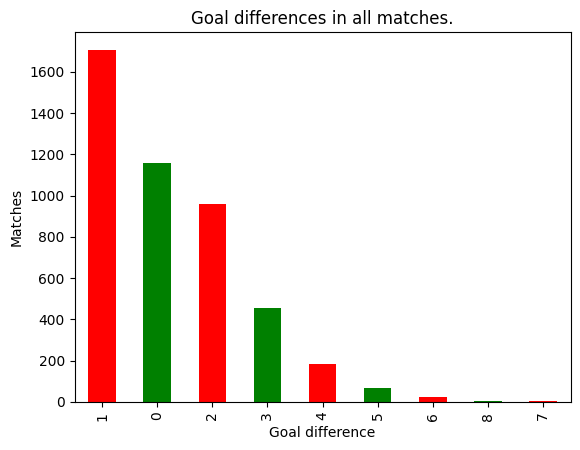

In [1196]:
df['goal_differences'].value_counts().plot(kind='bar', 
                                          color=['red','green'], 
                                          xlabel='Goal difference', 
                                          ylabel='Matches', 
                                          title='Goal differences in all matches.')

plt.show()

In [1197]:
#########################################################################################################

In [1198]:
'''
7.What's the team with most away wins?
'''

"\n7.What's the team with most away wins?\n"

In [1199]:
df.head()

,home_team,away_team,home_goals,away_goals,result,season,total_goals,goal_differences
0,Sheffield United,Liverpool,1,1,D,2006-2007,2,0
1,Arsenal,Aston Villa,1,1,D,2006-2007,2,0
2,Everton,Watford,2,1,H,2006-2007,3,1
3,Newcastle United,Wigan Athletic,2,1,H,2006-2007,3,1
4,Portsmouth,Blackburn Rovers,3,0,H,2006-2007,3,3


In [1200]:
# aggregation and filtering
# Answer
most_away_wins = df.groupby('away_team').apply(lambda rows: (rows['result'] == 'A').sum()).sort_values(ascending=False).head()
most_away_wins

C:\Users\AmerM\AppData\Local\Temp\ipykernel_56160\3996122848.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  most_away_wins = df.groupby('away_team').apply(lambda rows: (rows['result'] == 'A').sum()).sort_values(ascending=False).head()


away_team
Chelsea              120
Manchester United    117
Arsenal              103
Manchester City       98
Liverpool             98
dtype: int64

In [1201]:
df.groupby('away_team').size().sort_values(ascending=False)


away_team
Liverpool                   228
Tottenham Hotspur           228
Manchester United           228
Manchester City             228
Arsenal                     228
Everton                     228
Chelsea                     228
West Ham United             209
Newcastle United            190
Sunderland                  190
Stoke City                  190
Aston Villa                 190
West Bromwich Albion        171
Fulham                      152
Wigan Athletic              133
Swansea City                133
Southampton                 114
Bolton Wanderers            114
Blackburn Rovers            114
Crystal Palace               95
Hull City                    95
Watford                      76
Burnley                      76
Leicester City               76
Middlesbrough                76
Norwich City                 76
Portsmouth                   76
AFC Bournemouth              57
Reading                      57
Queens Park Rangers          57
Birmingham City              5

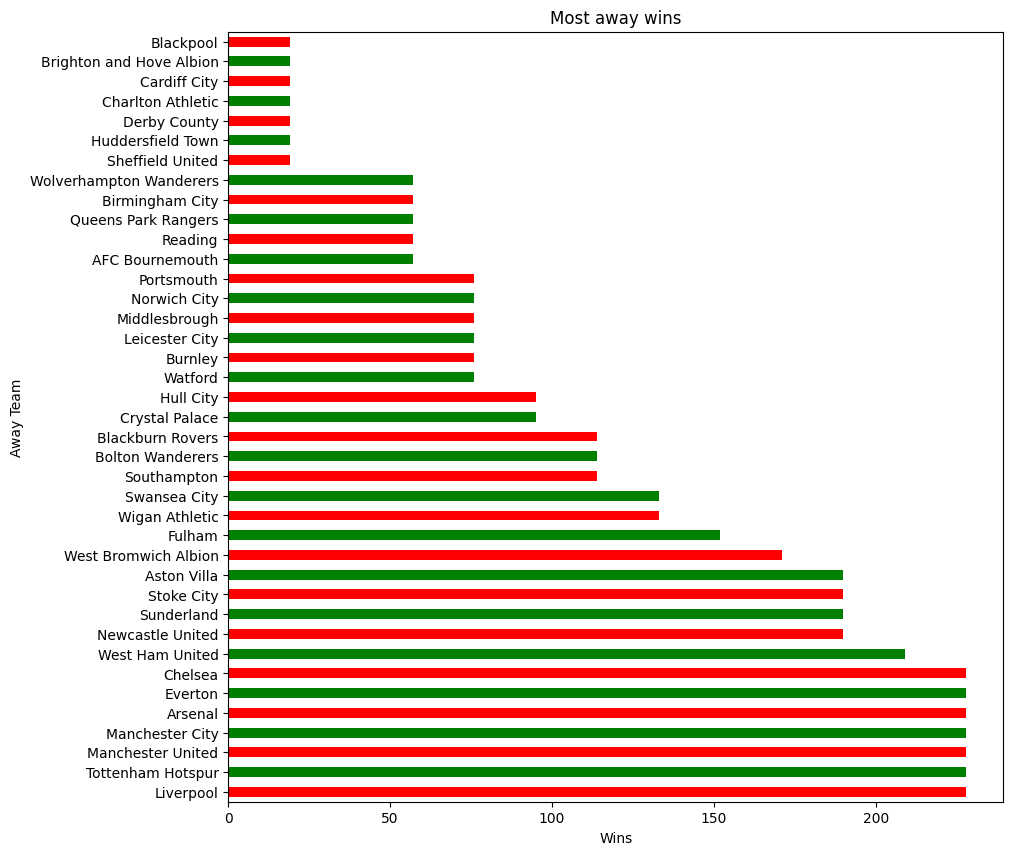

In [1202]:
df.groupby('away_team').size().sort_values(ascending=False).plot(kind='barh',
                                                                figsize=(10,10),
                                                                color=['red','green'],
                                                                xlabel='Wins',
                                                                ylabel='Away Team',
                                                                title='Most away wins')
plt.show()

In [1203]:
#########################################################################################################

In [1204]:
'''
8.What's the team with the most goals scored at home?
'''

"\n8.What's the team with the most goals scored at home?\n"

In [1205]:
df.head()

,home_team,away_team,home_goals,away_goals,result,season,total_goals,goal_differences
0,Sheffield United,Liverpool,1,1,D,2006-2007,2,0
1,Arsenal,Aston Villa,1,1,D,2006-2007,2,0
2,Everton,Watford,2,1,H,2006-2007,3,1
3,Newcastle United,Wigan Athletic,2,1,H,2006-2007,3,1
4,Portsmouth,Blackburn Rovers,3,0,H,2006-2007,3,3


In [1206]:
# aggregation and filtering
# Answer
df.groupby('home_team')['home_goals'].sum().sort_values(ascending=False).head()

home_team
Manchester City      499
Manchester United    495
Chelsea              488
Arsenal              471
Liverpool            459
Name: home_goals, dtype: int64

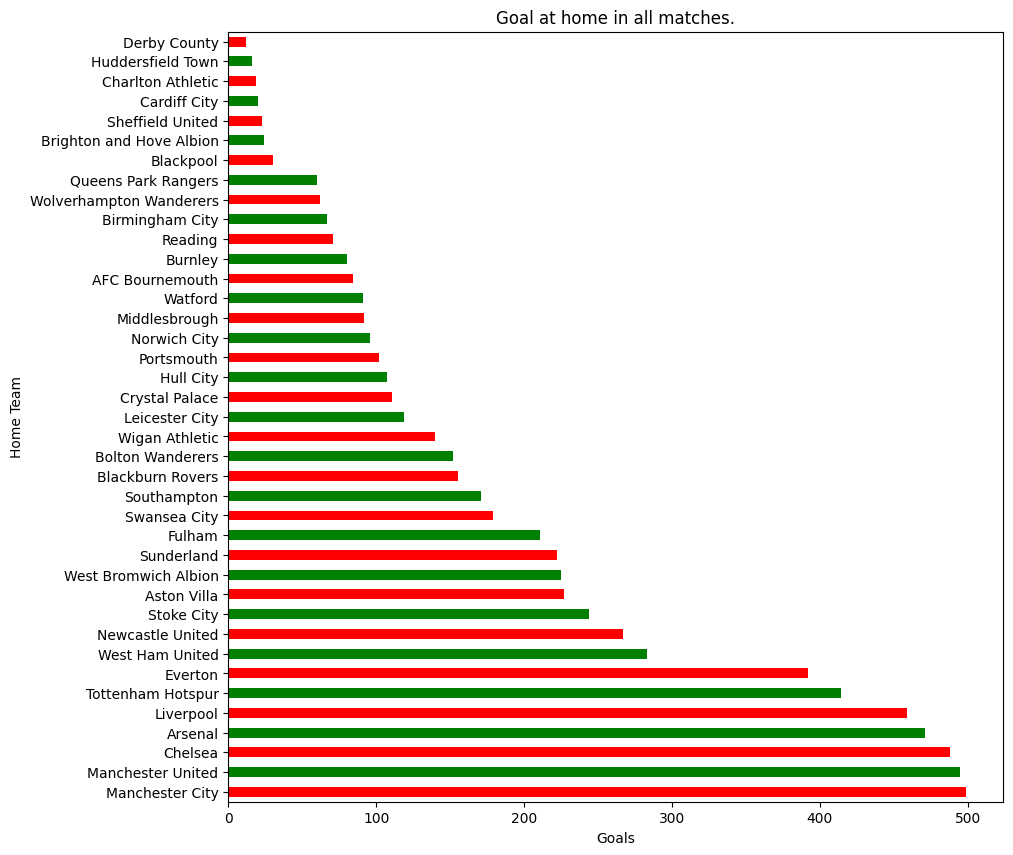

In [1207]:
df.groupby('home_team')['home_goals'].sum().sort_values(ascending=False).plot(kind='barh',
                                                                              figsize=(10,10),
                                                                              color=['red','green'],
                                                                              xlabel='Goals',
                                                                              ylabel='Home Team',
                                                                              title='Goal at home in all matches.')
plt.show()

In [1208]:
#########################################################################################################

In [1209]:
'''
9. What's the team that received the least amount of goals while playing at home?
'''

"\n9. What's the team that received the least amount of goals while playing at home?\n"

In [1210]:
df.head()

,home_team,away_team,home_goals,away_goals,result,season,total_goals,goal_differences
0,Sheffield United,Liverpool,1,1,D,2006-2007,2,0
1,Arsenal,Aston Villa,1,1,D,2006-2007,2,0
2,Everton,Watford,2,1,H,2006-2007,3,1
3,Newcastle United,Wigan Athletic,2,1,H,2006-2007,3,1
4,Portsmouth,Blackburn Rovers,3,0,H,2006-2007,3,3


In [1211]:
# aggregation and filtering
# Answer
df[["home_team", "away_goals"]].groupby("home_team").mean().sort_values(by="away_goals").head()

,away_goals
home_team,
Manchester United,0.692982
Liverpool,0.789474
Arsenal,0.802632
Chelsea,0.802632
Manchester City,0.815789


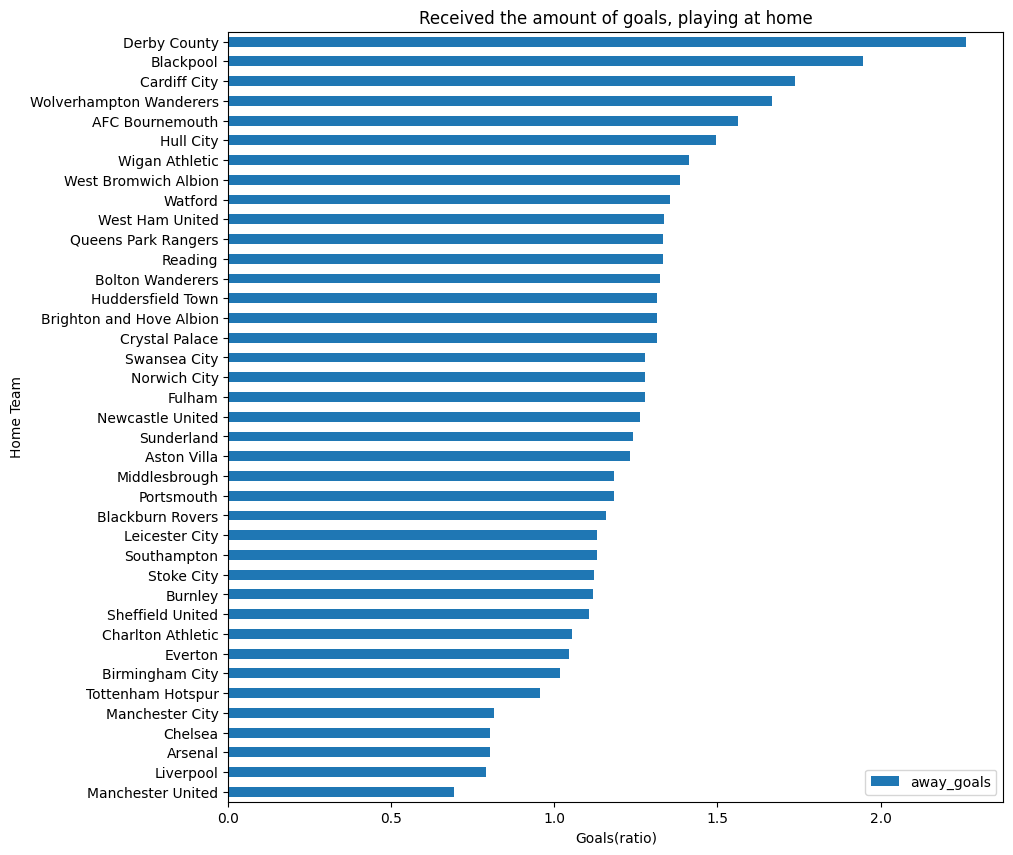

In [1212]:
df[["home_team", "away_goals"]].groupby("home_team").mean().sort_values(by="away_goals").plot(kind='barh',
                                                                                        figsize=(10,10),
                                                                                        xlabel='Goals(ratio)',
                                                                                        ylabel='Home Team',
                                                                                        title='Received the amount of goals, playing at home')
plt.show()

In [1213]:
#########################################################################################################

In [1214]:
'''
10. What's the team with most goals scored playing as a visitor (away from home)?
'''

"\n10. What's the team with most goals scored playing as a visitor (away from home)?\n"

In [1215]:
df.head()

,home_team,away_team,home_goals,away_goals,result,season,total_goals,goal_differences
0,Sheffield United,Liverpool,1,1,D,2006-2007,2,0
1,Arsenal,Aston Villa,1,1,D,2006-2007,2,0
2,Everton,Watford,2,1,H,2006-2007,3,1
3,Newcastle United,Wigan Athletic,2,1,H,2006-2007,3,1
4,Portsmouth,Blackburn Rovers,3,0,H,2006-2007,3,3


In [1216]:
# aggregation and filtering
# Answer
df[["away_team", "away_goals"]].groupby("away_team").mean().sort_values(by="away_goals",ascending=False).head()

,away_goals
away_team,
Arsenal,1.662281
Manchester United,1.605263
Manchester City,1.574561
Chelsea,1.565789
Liverpool,1.526316


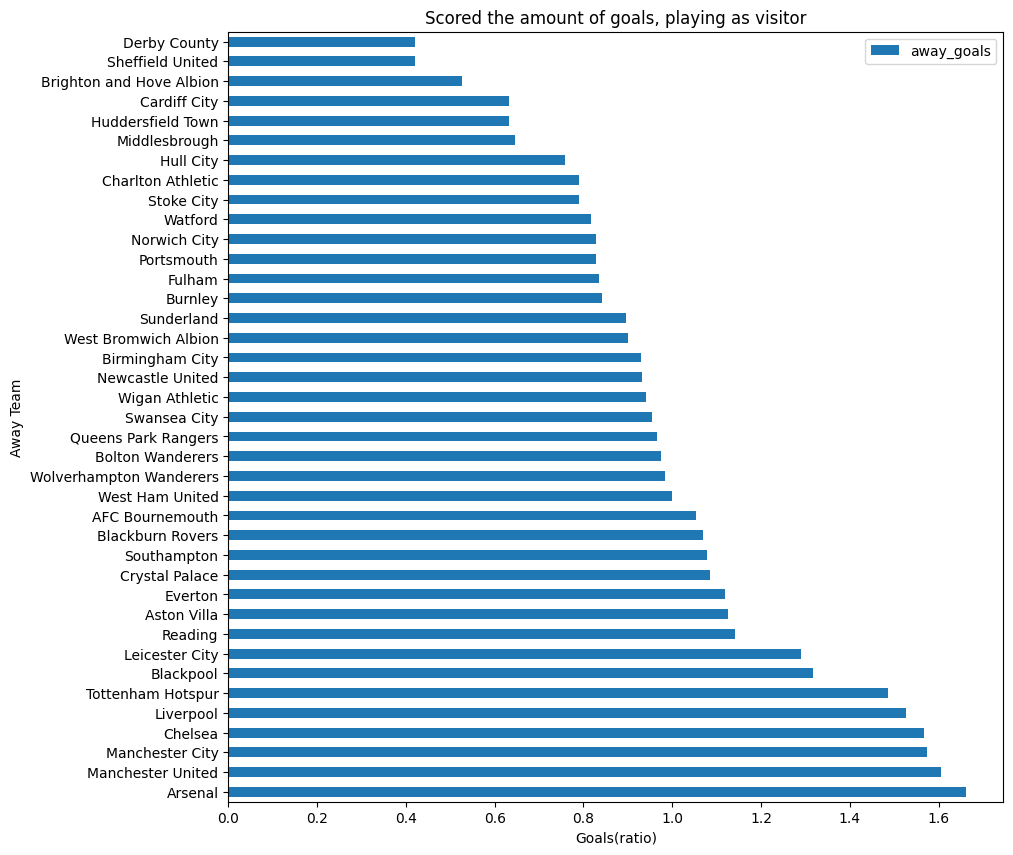

In [1217]:
df[["away_team", "away_goals"]].groupby("away_team").mean().sort_values(by="away_goals",ascending=False).plot(kind='barh', 
                                                                                                              figsize=(10,10),
                                                                                                              xlabel='Goals(ratio)',
                                                                                                              ylabel='Away Team',
                                                                                                              title='Scored the amount of goals, playing as visitor')
plt.show()

In [1218]:
#########################################################################################################

In [1219]:
'''
11. create a table that shows which team won the cup based on the points.
'''

'\n11. create a table that shows which team won the cup based on the points.\n'

In [1220]:
df['home_point'] = 0
df['away_point'] = 0

In [1221]:
df.loc[df['result'] == 'D', 'home_point'] = 1 
df.loc[df['result'] == 'H', 'home_point'] = 3
df.loc[df['result'] == 'A', 'home_point'] = 0


df.loc[df['result'] == 'D', 'away_point'] = 1
df.loc[df['result'] == 'A', 'away_point'] = 3
df.loc[df['result'] == 'H', 'away_point'] = 0

In [1222]:
df.head()

,home_team,away_team,home_goals,away_goals,result,season,total_goals,goal_differences,home_point,away_point
0,Sheffield United,Liverpool,1,1,D,2006-2007,2,0,1,1
1,Arsenal,Aston Villa,1,1,D,2006-2007,2,0,1,1
2,Everton,Watford,2,1,H,2006-2007,3,1,3,0
3,Newcastle United,Wigan Athletic,2,1,H,2006-2007,3,1,3,0
4,Portsmouth,Blackburn Rovers,3,0,H,2006-2007,3,3,3,0


In [1223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   home_team         4560 non-null   object
 1   away_team         4560 non-null   object
 2   home_goals        4560 non-null   int64 
 3   away_goals        4560 non-null   int64 
 4   result            4560 non-null   object
 5   season            4560 non-null   object
 6   total_goals       4560 non-null   int64 
 7   goal_differences  4560 non-null   int64 
 8   home_point        4560 non-null   int64 
 9   away_point        4560 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 356.4+ KB


In [1224]:
# aggregation and filtering

home_points_table = df.groupby(['season', 'home_team']).agg({'home_point': 'sum'}).reset_index()
home_points_table.columns = ['season', 'team', 'points']

away_points_table = df.groupby(['season', 'away_team']).agg({'away_point': 'sum'}).reset_index()
away_points_table.columns = ['season', 'team', 'points']

points_table = pd.concat([home_points_table, away_points_table], ignore_index=True)
total_points_table = points_table.groupby(['season', 'team']).agg({'points': 'sum'}).reset_index()

In [1225]:
# aggregation and filtering
# by season: (2006-2007)
grouped = total_points_table.groupby('season')
season_winner = grouped.get_group('2006-2007').sort_values(by='points',ascending=False).reset_index(drop=True)

season_winner

,season,team,points
0,2006-2007,Manchester United,89
1,2006-2007,Chelsea,81
2,2006-2007,Liverpool,68
3,2006-2007,Arsenal,68
4,2006-2007,Tottenham Hotspur,60
5,2006-2007,Everton,58
6,2006-2007,Bolton Wanderers,56
7,2006-2007,Blackburn Rovers,55
8,2006-2007,Reading,55
9,2006-2007,Portsmouth,54


<Axes: >

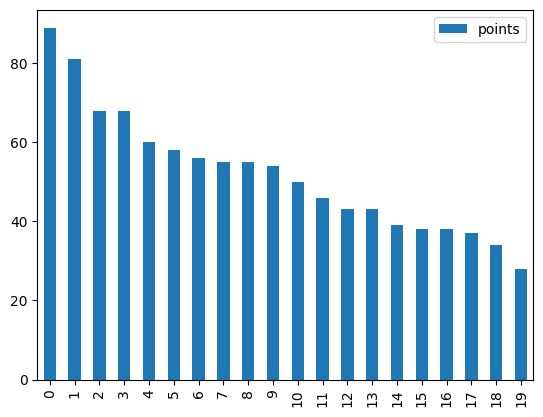

In [1226]:
season_winner.plot(kind='bar')

In [1227]:
# aggregation and filtering
# Answer
max_points_indices = total_points_table.groupby('season')['points'].transform(max) == total_points_table['points']
cup_winner = total_points_table[max_points_indices].reset_index(drop=True)

cup_winner

C:\Users\AmerM\AppData\Local\Temp\ipykernel_56160\3232668096.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  max_points_indices = total_points_table.groupby('season')['points'].transform(max) == total_points_table['points']


,season,team,points
0,2006-2007,Manchester United,89
1,2007-2008,Manchester United,87
2,2008-2009,Manchester United,90
3,2009-2010,Chelsea,86
4,2010-2011,Manchester United,80
5,2011-2012,Manchester City,91
6,2012-2013,Manchester United,89
7,2013-2014,Liverpool,86
8,2013-2014,Manchester City,86
9,2014-2015,Chelsea,84


In [1228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   home_team         4560 non-null   object
 1   away_team         4560 non-null   object
 2   home_goals        4560 non-null   int64 
 3   away_goals        4560 non-null   int64 
 4   result            4560 non-null   object
 5   season            4560 non-null   object
 6   total_goals       4560 non-null   int64 
 7   goal_differences  4560 non-null   int64 
 8   home_point        4560 non-null   int64 
 9   away_point        4560 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 356.4+ KB


In [1229]:
# Save to Parquet
df.to_parquet('PremierLeague.parquet', index=False)

In [1230]:
pd.read_parquet('PremierLeague.parquet') 

,home_team,away_team,home_goals,away_goals,result,season,total_goals,goal_differences,home_point,away_point
0,Sheffield United,Liverpool,1,1,D,2006-2007,2,0,1,1
1,Arsenal,Aston Villa,1,1,D,2006-2007,2,0,1,1
2,Everton,Watford,2,1,H,2006-2007,3,1,3,0
3,Newcastle United,Wigan Athletic,2,1,H,2006-2007,3,1,3,0
4,Portsmouth,Blackburn Rovers,3,0,H,2006-2007,3,3,3,0
...,...,...,...,...,...,...,...,...,...,...
4555,Newcastle United,Chelsea,3,0,H,2017-2018,3,3,3,0
4556,Southampton,Manchester City,0,1,A,2017-2018,1,1,0,3
4557,Swansea City,Stoke City,1,2,A,2017-2018,3,1,0,3
4558,Tottenham Hotspur,Leicester City,5,4,H,2017-2018,9,1,3,0
